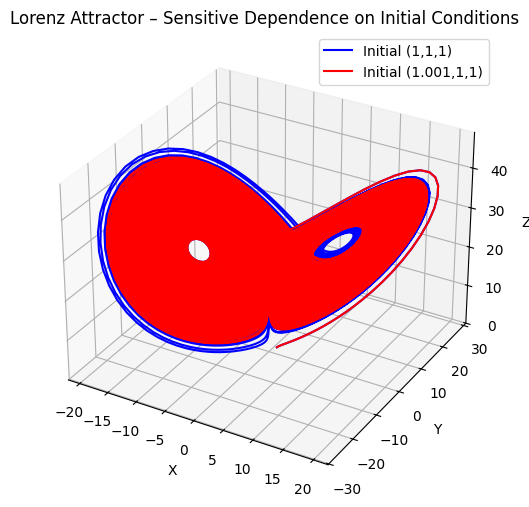

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

# Lorenz system parameters
sigma = 10.0
beta = 8.0 / 3.0
rho = 28.0

# Time integration
dt = 0.01
num_steps = 100_000

# Two initial conditions that differ by only 0.001
init1 = np.array([1.0, 1.0, 1.0])
init2 = np.array([1.001, 1.0, 1.0])  # tiny perturbation

states1 = np.zeros((num_steps, 3))
states2 = np.zeros((num_steps, 3))

states1[0] = init1
states2[0] = init2

def lorenz_rhs(x):
    return np.array([
        sigma * (x[1] - x[0]),
        x[0] * (rho - x[2]) - x[1],
        x[0] * x[1] - beta * x[2]
    ])

def rk4_step(x, dt):
    k1 = lorenz_rhs(x)
    k2 = lorenz_rhs(x + 0.5 * dt * k1)
    k3 = lorenz_rhs(x + 0.5 * dt * k2)
    k4 = lorenz_rhs(x + dt * k3)
    return x + (dt/6.0) * (k1 + 2*k2 + 2*k3 + k4)

# Integrate both trajectories
for i in range(1, num_steps):
    states1[i] = rk4_step(states1[i-1], dt)
    states2[i] = rk4_step(states2[i-1], dt)

# -- PLOT BOTH ON ONE 3D AXIS --
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot(states1[:,0], states1[:,1], states1[:,2], color='blue',  label='Initial (1,1,1)')
ax.plot(states2[:,0], states2[:,1], states2[:,2], color='red',   label='Initial (1.001,1,1)')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Lorenz Attractor – Sensitive Dependence on Initial Conditions')
ax.legend()

plt.show()



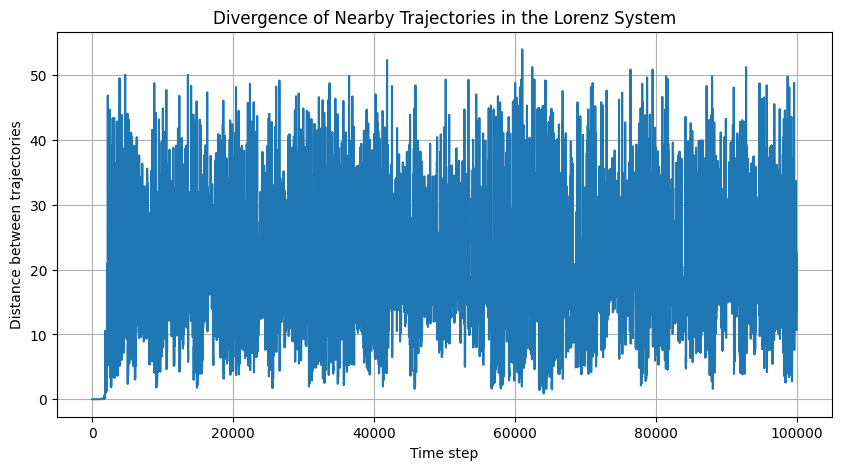

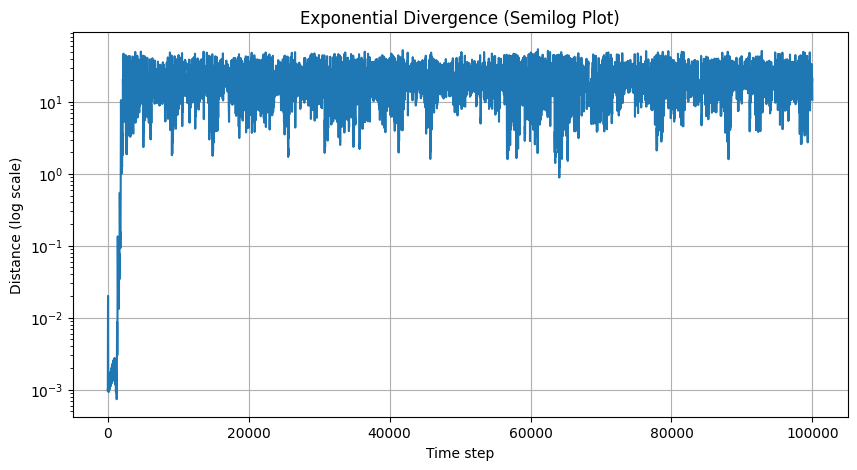

In [4]:
# Compute distance between the two trajectories at each timestep
distances = np.linalg.norm(states1 - states2, axis=1)

# Plot the divergence
plt.figure(figsize=(10, 5))
plt.plot(distances)
plt.xlabel("Time step")
plt.ylabel("Distance between trajectories")
plt.title("Divergence of Nearby Trajectories in the Lorenz System")
plt.grid(True)
plt.show()

# Also show a log plot (reveals exponential divergence)
plt.figure(figsize=(10, 5))
plt.semilogy(distances)
plt.xlabel("Time step")
plt.ylabel("Distance (log scale)")
plt.title("Exponential Divergence (Semilog Plot)")
plt.grid(True)
plt.show()
